In [0]:
import pandas as pd
df=pd.read_csv("/Volumes/workspace/default/netflix/netflix_cleaned.csv")
print(df.shape)
df.head()

(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 Min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Available,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [0]:
# Check total null values per column
null_counts = df.isnull().sum().sort_values(ascending=False)

print( "Null Values per Column:")
print(null_counts)

# (Optional) Check percentage of nulls
null_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)
print("\nPercentage of Nulls per Column:")
print(null_percentage)

Null Values per Column:
date_added      10
show_id          0
type             0
title            0
director         0
cast             0
country          0
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

Percentage of Nulls per Column:
date_added      0.113546
show_id         0.000000
type            0.000000
title           0.000000
director        0.000000
cast            0.000000
country         0.000000
release_year    0.000000
rating          0.000000
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64


In [0]:
# Convert 'date_added' to datetime and extract year
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['year_added'] = df['year_added'].fillna(0)


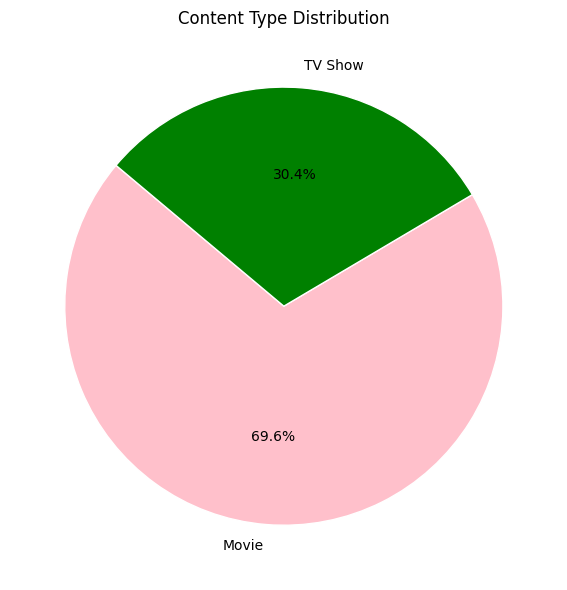

In [0]:
import matplotlib.pyplot as plt
#Distribution of Content Type
type_counts = df['type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', 
        colors=['pink', 'green'], startangle=140, wedgeprops={'edgecolor':'white'})
plt.title('Content Type Distribution')
plt.tight_layout()
plt.show()

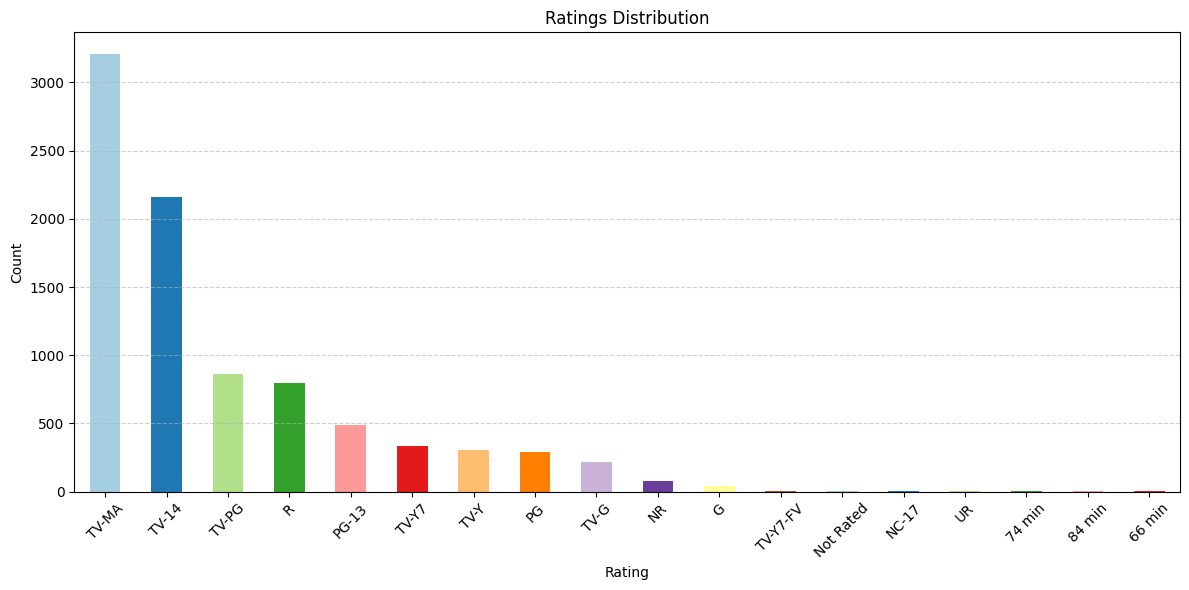

In [0]:
#Distribution of Ratings
plt.figure(figsize=(12,6))
df['rating'].value_counts().plot(kind='bar', color=plt.cm.Paired.colors)
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


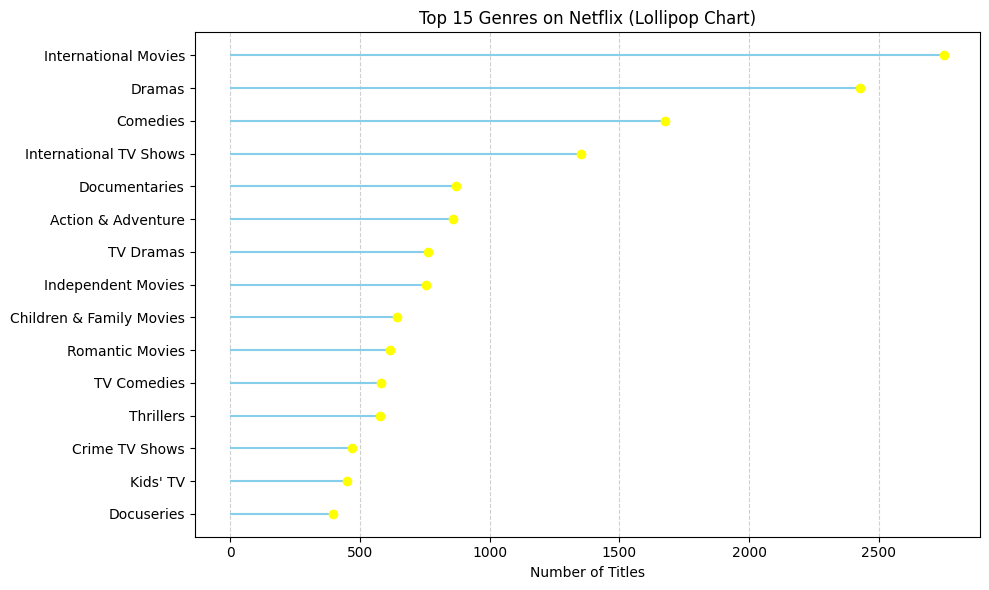

In [0]:
#Distribution of Genres
# Split the 'listed_in' column by commas and explode
genres = df['listed_in'].str.split(', ').explode().value_counts().head(15)
genres = genres.sort_values()  # sort ascending for vertical lollipop

plt.figure(figsize=(10,6))
plt.hlines(y=genres.index, xmin=0, xmax=genres.values, color='skyblue')
plt.plot(genres.values, genres.index, 'o', color='yellow')

plt.title('Top 15 Genres on Netflix (Lollipop Chart)')
plt.xlabel('Number of Titles')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


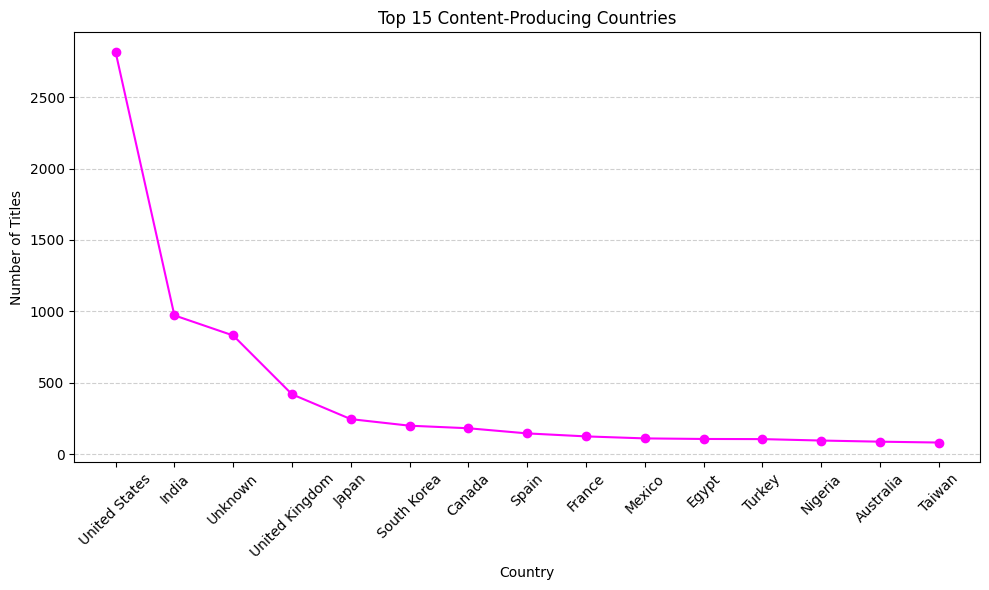

In [0]:
#Country-Level Contributions
top_countries = df['country'].value_counts().head(15).sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.plot(top_countries.index, top_countries.values, marker='o', color='magenta')
plt.title('Top 15 Content-Producing Countries')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


BIVARIATE

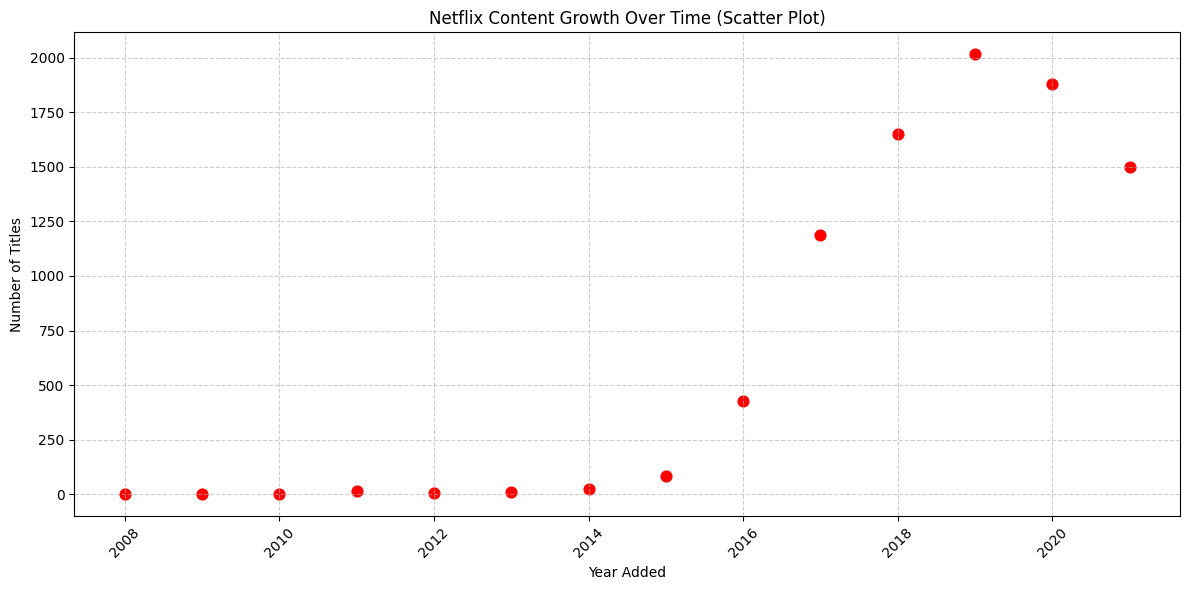

In [0]:

#Content Growth Over Time
# Make sure date_added is datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

# Group by year and count titles
content_growth = df.groupby('year_added').size().reset_index(name='count')
content_growth = content_growth.sort_values('year_added')

# Scatter plot
plt.figure(figsize=(12,6))
plt.scatter(content_growth['year_added'], content_growth['count'], color='red', s=60)

plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.title('Netflix Content Growth Over Time (Scatter Plot)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



In [0]:
import seaborn as sns

# Only for movies with valid duration
movies = df[df['type'] == 'Movie'].copy()
movies['duration_num'] = (
    movies['duration'].str.extract('(\d+)').astype(float)
)
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=movies,
    x='year_added',
    y='duration_num',
    hue='origin_label',
    alpha=0.7
)
plt.title('Movie Duration vs. Year Added')
plt.xlabel('Year Added')
plt.ylabel('Duration (min)')
plt.legend(title='Origin')
plt.tight_layout()
plt.show()

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
/home/spark-0740115c-cc98-4b67-82f2-5d/.ipykernel/2478/command-7159982391788686-3940490092:6: SyntaxWarning: invalid escape sequence '\d'
  movies['duration'].str.extract('(\d+)').astype(float)
/home/spark-0740115c-cc98-4b67-82f2-5d/.ipykernel/2478/command-7159982391788686-3940490092:6: SyntaxWarning: invalid escape sequence '\d'
  movies['duration'].str.extract('(\d+)').astype(float)


<Figure size 1000x600 with 0 Axes>

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File <command-7159982391788686>, line 9
      5 movies['duration_num'] = (
      6     movies['duration'].str.extract('(\d+)').astype(float)
      7 )
      8 plt.figure(figsize=(10,6))
----> 9 sns.scatterplot(
     10     data=movies,
     11     x='year_added',
     12     y='duration_num',
     13     hue='origin_label',
     14     alpha=0.7
     15 )
     16 plt.title('Movie Duration vs. Year Added')
     17 plt.xlabel('Year Added')

File /databricks/python/lib/python3.12/site-packages/seaborn/relational.py:615, in scatterplot(data, x, y, hue, size, style, palette, hue_order, hue_norm, sizes, size_order, size_norm, markers, style_order, legend, ax, **kwargs)
    606 def scatterplot(
    607     data=None, *,
    608     x=None, y=None, hue=None, size=None, style=None,
   (...)
    612     **kwargs
    613 ):
--> 615     p = _Scatte

In [0]:
plt.figure(figsize=(10,6))
sns.histplot(
    data=movies,
    x='duration_num',
    hue='rating',
    multiple='stack',
    palette='Set1',
    bins=30
)
plt.title('Distribution of Movie Duration by Rating')
plt.xlabel('Duration (min)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

FEATURE ENGINEERING

In [0]:
#Derived Feature – Original vs Licensed
df['is_original'] = df['title'].str.contains('(?i)netflix', na=False)
df['origin_label'] = df['is_original'].map({True: 'Original', False: 'Licensed'})

origin_counts = df['origin_label'].value_counts()

plt.figure(figsize=(6,4))
origin_counts.plot(kind='bar')
plt.title('Original vs Licensed Content')
plt.ylabel('Count')
plt.show()


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/home/spark-0740115c-cc98-4b67-82f2-5d/.ipykernel/2478/command-4916063536202881-18077778:5: SyntaxWarning: invalid escape sequence '\d'
  movies['duration'].str.extract('(\d+)').astype(float)


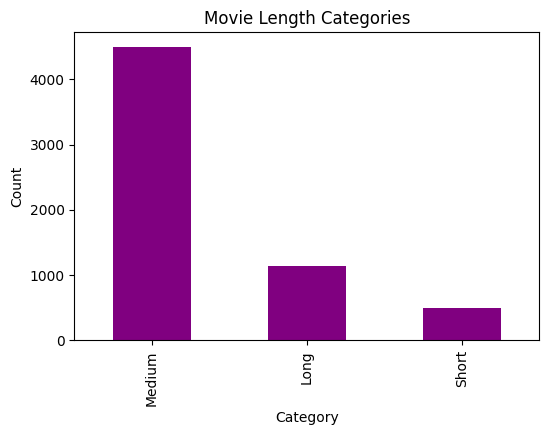

In [0]:
#Derived Feature – Content Length Category (Movies)
# Filter movies and clean duration (e.g., "90 min")
movies = df[df['type'] == 'Movie'].copy()
movies['duration_num'] = (
    movies['duration'].str.extract('(\d+)').astype(float)
)

# Categorize length
movies['length_category'] = pd.cut(
    movies['duration_num'],
    bins=[0, 60, 120, float('inf')],
    labels=['Short', 'Medium', 'Long']
)

length_counts = movies['length_category'].value_counts()

plt.figure(figsize=(6,4))
length_counts.plot(kind='bar',color='purple')
plt.title('Movie Length Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
/home/spark-0740115c-cc98-4b67-82f2-5d/.ipykernel/2478/command-7394175724029916-3484872478:8: SyntaxWarning: invalid escape sequence '\d'
  tv_shows['seasons_num'] = tv_shows['duration'].str.extract('(\d+)').astype(float)


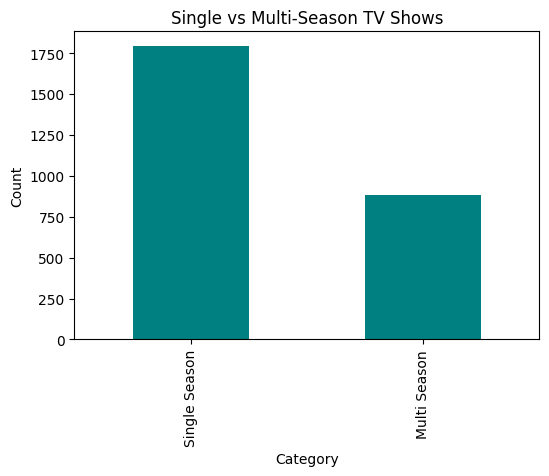

<unknown>:8: SyntaxWarning: invalid escape sequence '\d'


In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter only TV shows
tv_shows = df[df['type'] == 'TV Show'].copy()

# Extract numeric season info from "duration" column (e.g., "2 Seasons" → 2)
tv_shows['seasons_num'] = tv_shows['duration'].str.extract('(\d+)').astype(float)

# Categorize as single or multi season
tv_shows['season_category'] = pd.cut(
    tv_shows['seasons_num'],
    bins=[0, 1.5, float('inf')],
    labels=['Single Season', 'Multi Season']
)

# Count each category
season_counts = tv_shows['season_category'].value_counts()

# --- Visualization ---
plt.figure(figsize=(6,4))
season_counts.plot(kind='bar', color='teal')
plt.title('Single vs Multi-Season TV Shows')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()





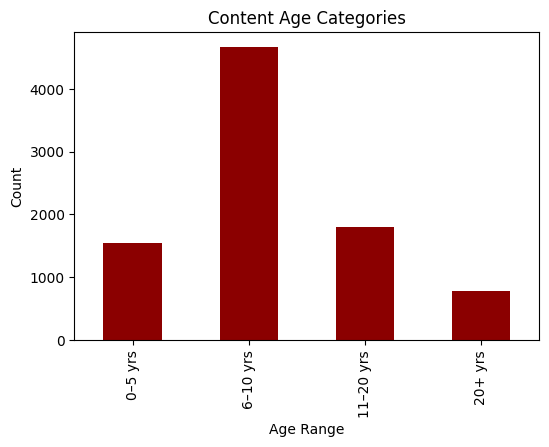

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Derived Feature 1: Content Age ---
content_age = 2025 - df['release_year']

# Categorize content age
age_category = pd.cut(
    content_age,
    bins=[0, 5, 10, 20, float('inf')],
    labels=['0–5 yrs', '6–10 yrs', '11–20 yrs', '20+ yrs']
)

age_counts = age_category.value_counts().sort_index()

plt.figure(figsize=(6,4))
age_counts.plot(kind='bar', color='darkred')
plt.title('Content Age Categories')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()


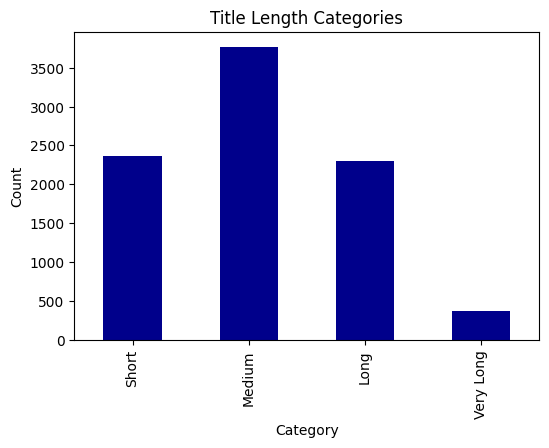

In [0]:
title_length = df['title'].apply(lambda x: len(str(x)))

# Categorize title length
title_length_category = pd.cut(
    title_length,
    bins=[0, 10, 20, 40, float('inf')],
    labels=['Short', 'Medium', 'Long', 'Very Long']
)

title_counts = title_length_category.value_counts().sort_index()

plt.figure(figsize=(6,4))
title_counts.plot(kind='bar', color='darkblue')
plt.title('Title Length Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()